# **Import the Required Models**

In [1]:
import os
import tensorflow as tf
from mediapipe_model_maker import gesture_recognizer
import matplotlib.pyplot as plt

c:\Users\ZAID\Downloads\deaf_n_dumb\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ZAID\Downloads\deaf_n_dumb\.conda\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
my_folder_path = 'sign_language_dataset'

In [3]:
print(my_folder_path)

sign_language_dataset


In [4]:
print(my_folder_path)
labels = []
for i in os.listdir(my_folder_path):
  if os.path.isdir(os.path.join(my_folder_path, i)):
    labels.append(i)
for label in labels:
  print(label + "\n")

sign_language_dataset
A

B

Bye

C

D

Deaf

E

F

G

H

Hello

I

ILoveYou

J

K

L

Learn

M

Me

Meet

N

Name

No

none

NotOk

O

Ok

P

Pen

Please

Q

R

S

T

Tell

Thankyou

U

V

W

X

Y

Yes



In [5]:
print(len(labels))

42


C:\Users\ZAID\AppData\Local\Temp\ipykernel_24784\1810984685.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))


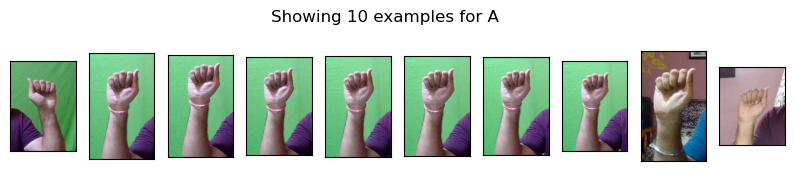

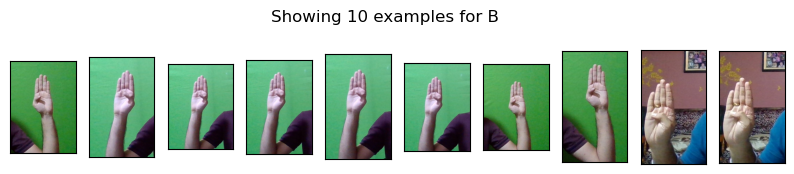

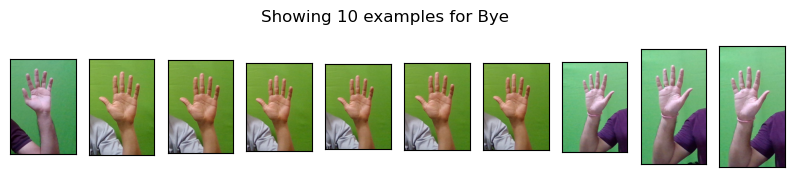

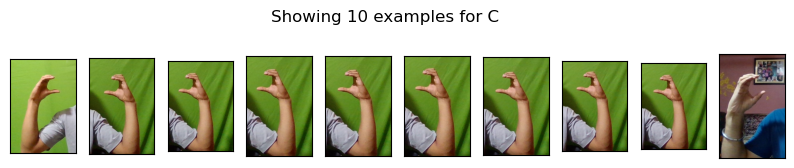

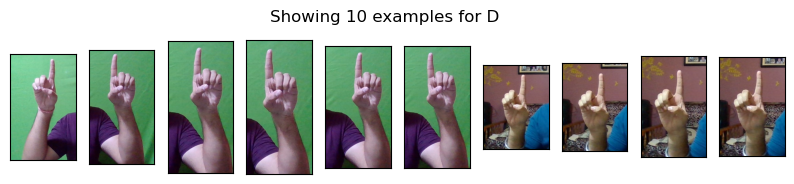

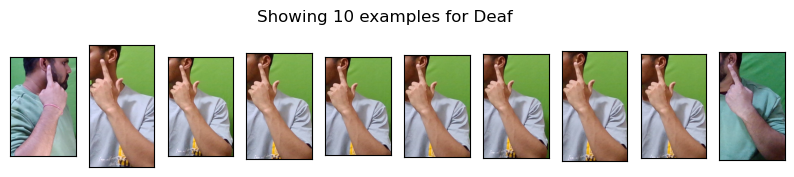

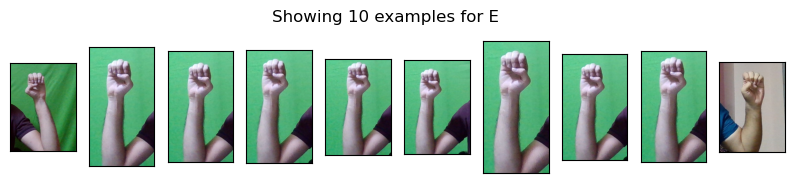

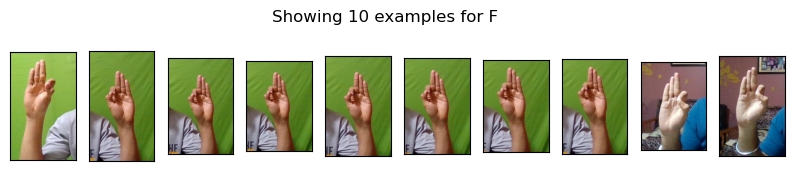

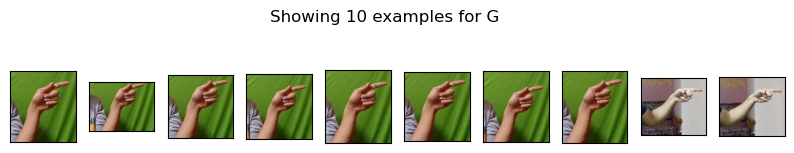

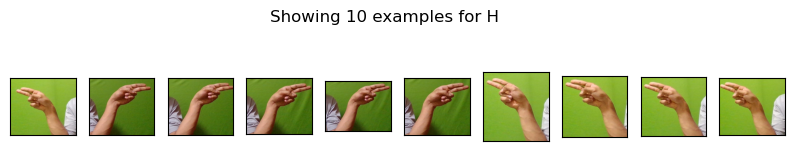

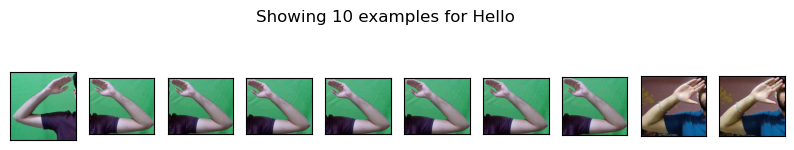

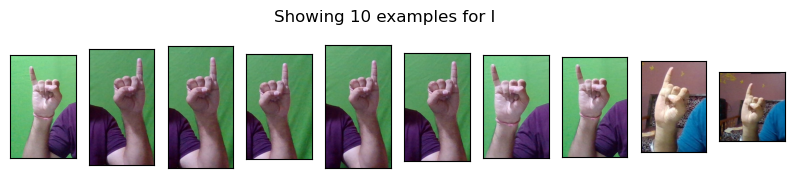

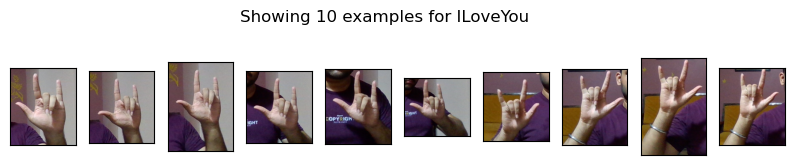

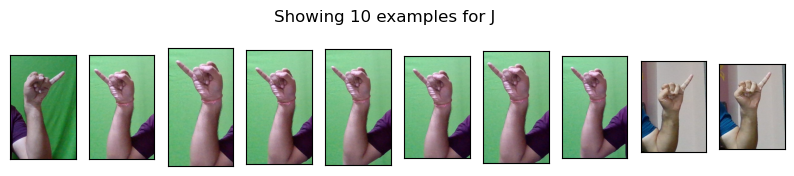

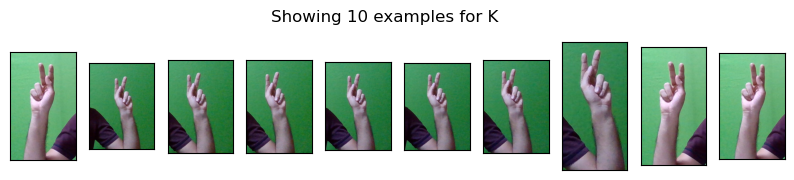

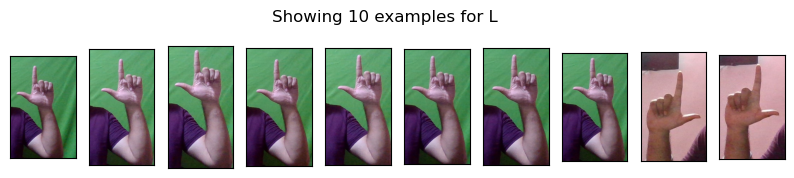

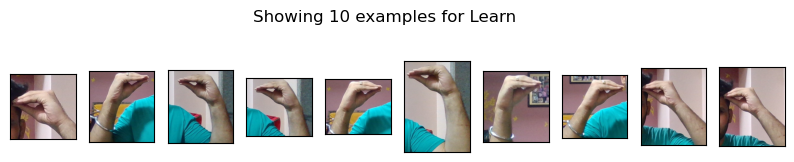

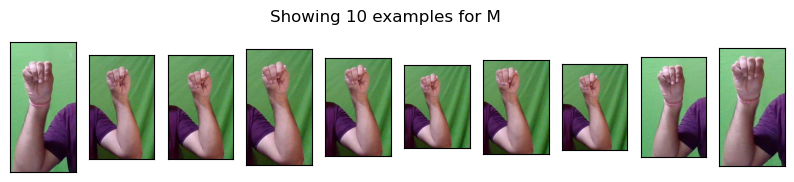

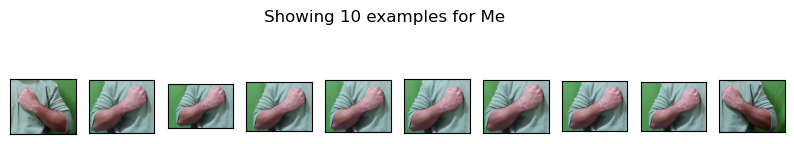

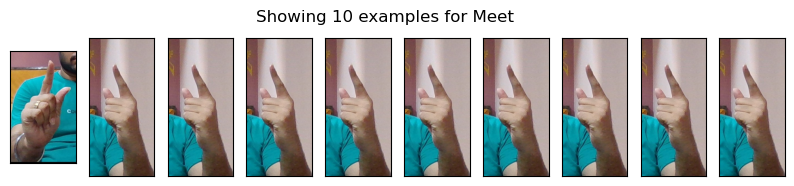

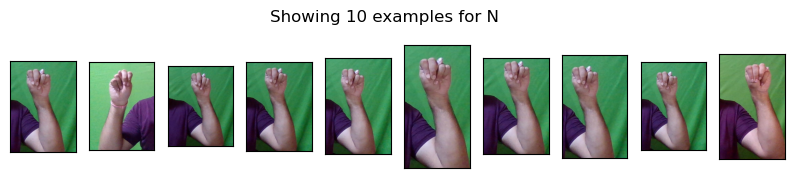

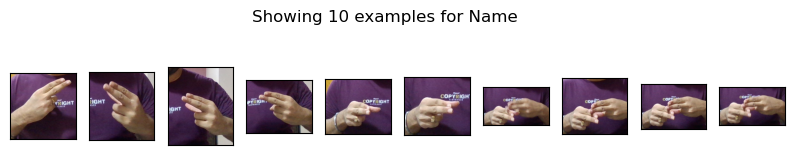

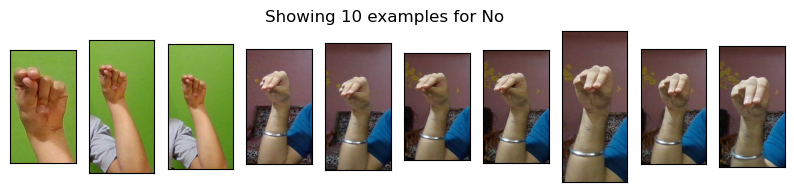

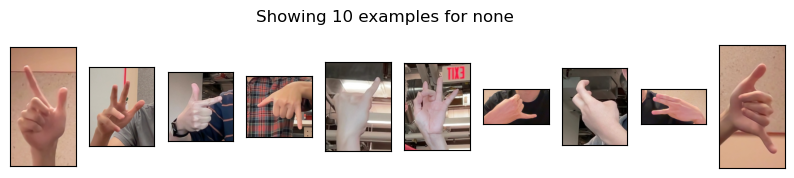

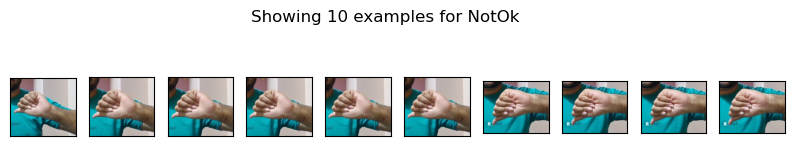

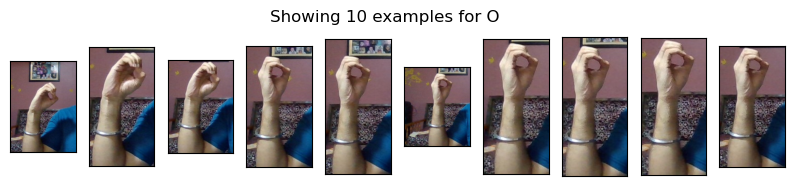

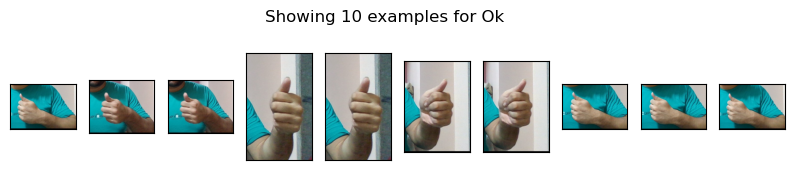

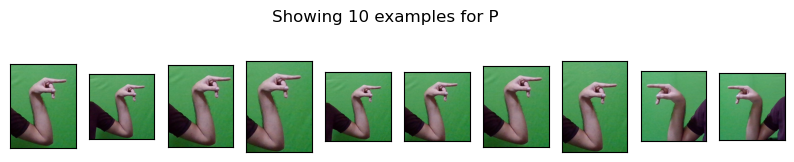

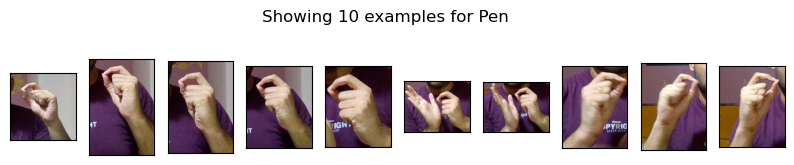

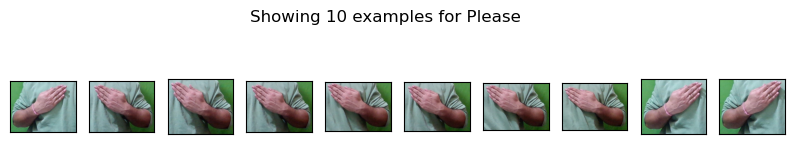

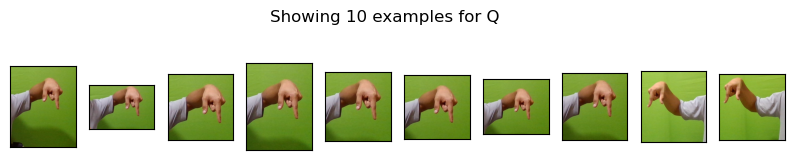

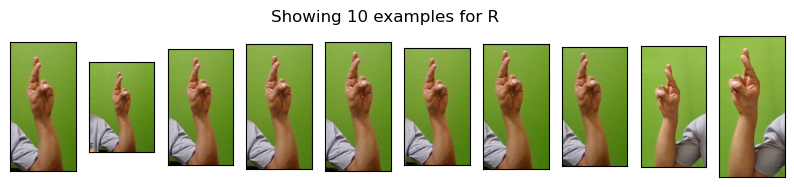

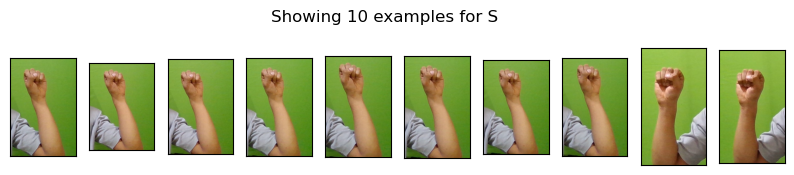

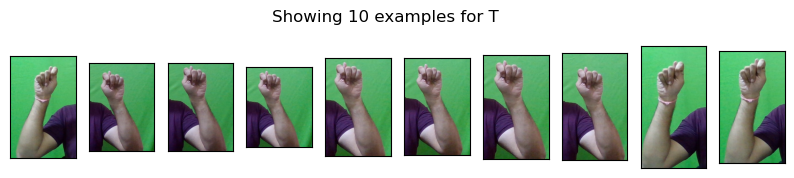

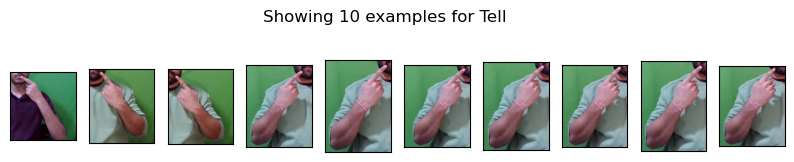

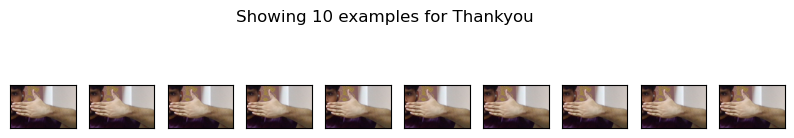

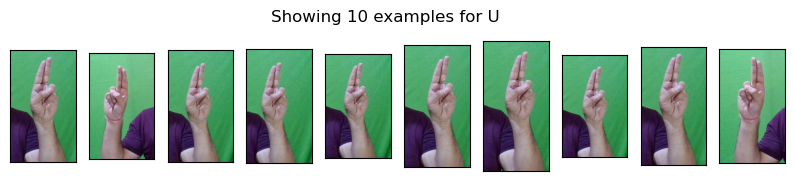

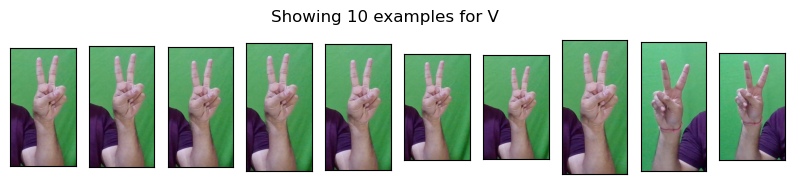

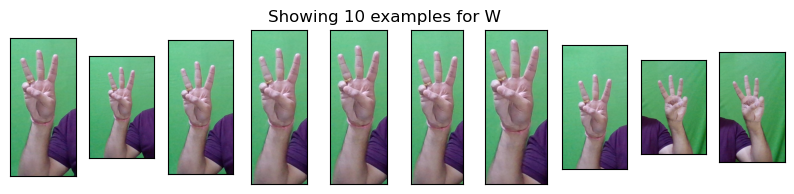

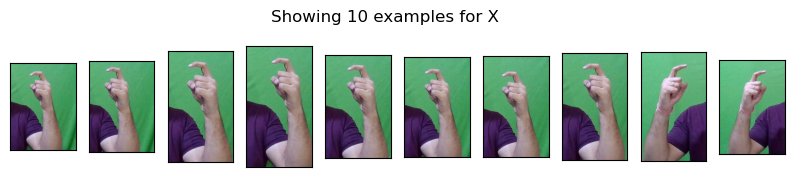

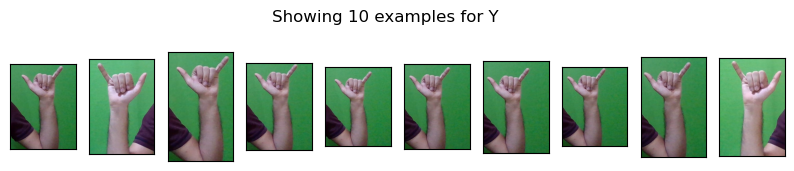

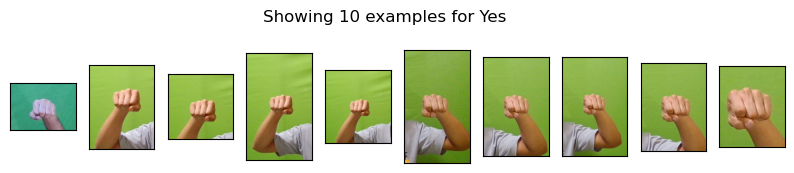

In [6]:
NUM_EXAMPLES = 10

for label in labels:
  label_dir = os.path.join(my_folder_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [7]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=my_folder_path,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Loading image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\L\L (58).jpg
INFO:tensorflow:Loading RGB image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\L\L (58).jpg
INFO:tensorflow:Loading image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\Tell\Tell (41).jpg
INFO:tensorflow:Loading RGB image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\Tell\Tell (41).jpg
INFO:tensorflow:Loading image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\J\J (14).jpg
INFO:tensorflow:Loading RGB image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\J\J (14).jpg
INFO:tensorflow:Loading image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\Tell\Tell (14).jpg
INFO:tensorflow:Loading RGB image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\Tell\Tell (14).jpg
INFO:tensorflow:Loading image c:\Users\ZAID\Downloads\deaf_n_dumb\sign_language_dataset\L\L (24).jpg
INFO:tensorflow:Loading RGB image c:\Users\ZAID\Dow

In [8]:
hparams = gesture_recognizer.HParams(export_dir="exported_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer)  [(None, 128)]            0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer (  (None, 42)               5418      
 Dense)                                                          
                                                                 
Total params: 5,930
Trainable params: 5,674
Non-trainable par

In [9]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

186/186 [==============================] - 0s 917us/step - loss: 0.7579 - categorical_accuracy: 0.8226
Test loss:0.7578829526901245, Test accuracy:0.8225806355476379


In [23]:
model.export_model()

INFO:tensorflow:Assets written to: C:\Users\ZAID\AppData\Local\Temp\tmpw660tmpd\saved_model\assets
